In [31]:
from neurodesign import geneticalgorithm, generate,msequence
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

%matplotlib inline


In [3]:
EXP = geneticalgorithm.experiment(
    TR=1.2,
    n_trials=100,
    P = [0.3,0.3,0.4],
    C = [[1,-1,0]],
    n_stimuli = 3,
    rho = 0.3,
    stim_duration=1,
    ITImodel = "uniform",
    ITImin = 2,
    ITImax=4
    )

/Users/Joke/anaconda/lib/python2.7/site-packages/neurodesign/geneticalgorithm.py:560: RuntimeWarning: divide by zero encountered in log
  res = (h - 1) * np.log(s) + h * np.log(l) - l * s - np.log(gamma(h))


In [4]:
DES1 = geneticalgorithm.design(
    order = [0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1],
    ITI = [2]*20,
    experiment=EXP
)
DES1.designmatrix()
DES1.FCalc(weights=[0.25,0.25,0.25,0.25])

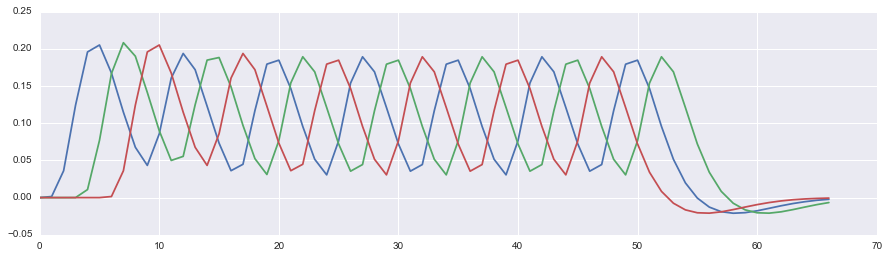

In [5]:
plt.figure(figsize=(15,4))
plt.plot(DES1.Xconv)
plt.savefig('Figure4.pdf', bbox_inches='tight')

In [70]:
DES2 = geneticalgorithm.design(
    order = [0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,1,1,1,1,1],
    ITI = [2]*20,
    experiment=EXP
)
DES2.designmatrix()
DES2.FCalc(weights=[0.25,0.25,0.25,0.25])

In [71]:
print("Ff of Design 1: "+str(DES1.Ff))
print("Ff of Design 2: "+str(DES2.Ff))
print("Fd of Design 1: "+str(DES1.Fd))
print("Fd of Design 2: "+str(DES2.Fd))

Ff of Design 1: 0.857142857143
Ff of Design 2: 0.428571428571
Fd of Design 1: 0.0870022296147
Fd of Design 2: 0


In [8]:
DES3,DES4 = DES1.crossover(DES2,seed=2000)
DES3.order

[0, 1, 2, 0, 1, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

In [9]:
DES4.order

[0, 0, 0, 0, 0, 1, 1, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1]

In [77]:
POP = geneticalgorithm.population(
    experiment=EXP,
    weights=[0,1,0.5,0.5],
    preruncycles = 200,
    cycles = 200,
    folder = "./",
    G = 100,
    seed=100
    )
POP.naturalselection()

100% |########################################################################|


KeyboardInterrupt: 

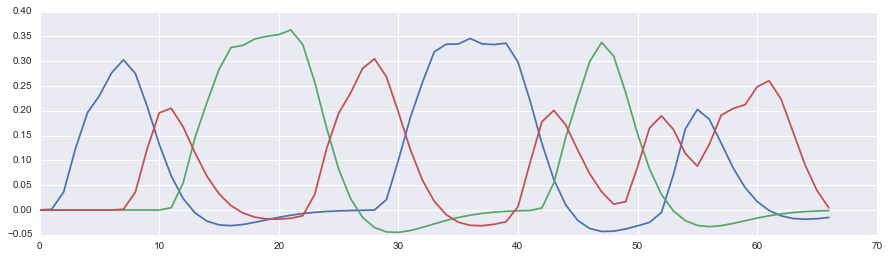

In [74]:
plt.figure(figsize=(15,4))
plt.plot(POP.bestdesign.Xconv)

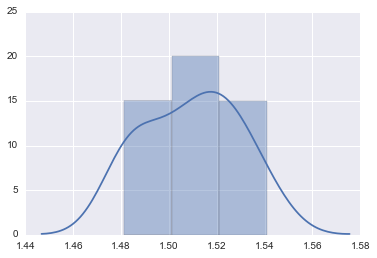

In [76]:
all = [POP.designs[i].F for i in range(20)]
sns.distplot(all)

In [66]:
# worst design
pvals = []
for i in range(100):
    idx = np.where(np.array(all)==np.min(all))[0][0]
    X = POP.designs[idx].Xconv
    y = 0.4*X[:,0]+0.2*X[:,1]+0.3*X[:,2]+np.random.normal(0,1,X.shape[0])
    data = {'y':y,'x1':X[:,0],'x2':X[:,1],'x3':X[:,2]}

    res = smf.glm('y ~ x1+x2+x3',data=data).fit()
    pvals.append(res.pvalues[1])

In [67]:
np.mean(pvals)

0.47208297890354933

In [68]:
# worst design
pvals = []
for i in range(100):
    idx = np.where(np.array(all)==np.max(all))[0][0]
    X = POP.designs[idx].Xconv
    y = 0.4*X[:,0]+0.2*X[:,1]+0.3*X[:,2]+np.random.normal(0,1,X.shape[0])
    data = {'y':y,'x1':X[:,0],'x2':X[:,1],'x3':X[:,2]}

    res = smf.glm('y ~ x1+x2+x3',data=data).fit()
    pvals.append(res.pvalues[1])

# Random sample

In [ ]:
np.random.normal(3,1,)